# Regression - Geçmiş Verilerden Geleceği Tahmin Etme

Bugün Regression algoritmalarını detaylı şekilde göreceğiz.

In [1]:
#pip install xlrd

In [1]:
import pandas as pd #data dosyalrını okuma paketi

In [2]:
df=pd.read_excel("cars.xls")

## EDA-Exploratory Data Analysis

In [3]:
df.head() #ilk 5 satır

Price  Mileage   Make    Model      Trim   Type  Cylinder  Liter  \
0  17314.103129     8221  Buick  Century  Sedan 4D  Sedan         6    3.1   
1  17542.036083     9135  Buick  Century  Sedan 4D  Sedan         6    3.1   
2  16218.847862    13196  Buick  Century  Sedan 4D  Sedan         6    3.1   
3  16336.913140    16342  Buick  Century  Sedan 4D  Sedan         6    3.1   
4  16339.170324    19832  Buick  Century  Sedan 4D  Sedan         6    3.1   

   Doors  Cruise  Sound  Leather  
0      4       1      1        1  
1      4       1      1        0  
2      4       1      1        0  
3      4       1      0        0  
4      4       1      0        1

In [4]:
df[df.Price==df.Price.max()]

Price  Mileage      Make   Model             Trim         Type  \
150  70755.466717      583  Cadillac  XLR-V8  Hardtop Conv 2D  Convertible   

     Cylinder  Liter  Doors  Cruise  Sound  Leather  
150         8    4.6      2       1      1        1

In [5]:
df.shape #satır ve sütun sayısı

(804, 12)

In [6]:
df.sample()

Price  Mileage     Make       Model          Trim   Type  \
506  20109.904121    22891  Pontiac  Bonneville  SLE Sedan 4D  Sedan   

     Cylinder  Liter  Doors  Cruise  Sound  Leather  
506         6    3.8      4       1      1        1

In [7]:
df.info() #veri hakkında bilgi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [8]:
df.describe() #istatistik

Price       Mileage    Cylinder       Liter       Doors  \
count    804.000000    804.000000  804.000000  804.000000  804.000000   
mean   21343.143767  19831.934080    5.268657    3.037313    3.527363   
std     9884.852801   8196.319707    1.387531    1.105562    0.850169   
min     8638.930895    266.000000    4.000000    1.600000    2.000000   
25%    14273.073870  14623.500000    4.000000    2.200000    4.000000   
50%    18024.995019  20913.500000    6.000000    2.800000    4.000000   
75%    26717.316636  25213.000000    6.000000    3.800000    4.000000   
max    70755.466717  50387.000000    8.000000    6.000000    4.000000   

           Cruise       Sound     Leather  
count  804.000000  804.000000  804.000000  
mean     0.752488    0.679104    0.723881  
std      0.431836    0.467111    0.447355  
min      0.000000    0.000000    0.000000  
25%      1.000000    0.000000    0.000000  
50%      1.000000    1.000000    1.000000  
75%      1.000000    1.000000    1.000000  
max      1.000000    1.000000    1.000000

In [9]:
df.corr(numeric_only=True)

Price   Mileage  Cylinder     Liter     Doors    Cruise  \
Price     1.000000 -0.143051  0.569086  0.558146 -0.138750  0.430851   
Mileage  -0.143051  1.000000 -0.029461 -0.018641 -0.016944  0.025037   
Cylinder  0.569086 -0.029461  1.000000  0.957897  0.002206  0.354285   
Liter     0.558146 -0.018641  0.957897  1.000000 -0.079259  0.377509   
Doors    -0.138750 -0.016944  0.002206 -0.079259  1.000000 -0.047674   
Cruise    0.430851  0.025037  0.354285  0.377509 -0.047674  1.000000   
Sound    -0.124348 -0.026146 -0.089704 -0.065527 -0.062530 -0.091730   
Leather   0.157197  0.001005  0.075520  0.087332 -0.061969 -0.070573   

             Sound   Leather  
Price    -0.124348  0.157197  
Mileage  -0.026146  0.001005  
Cylinder -0.089704  0.075520  
Liter    -0.065527  0.087332  
Doors    -0.062530 -0.061969  
Cruise   -0.091730 -0.070573  
Sound     1.000000  0.165444  
Leather   0.165444  1.000000

In [10]:
import seaborn as sns

<Axes: >

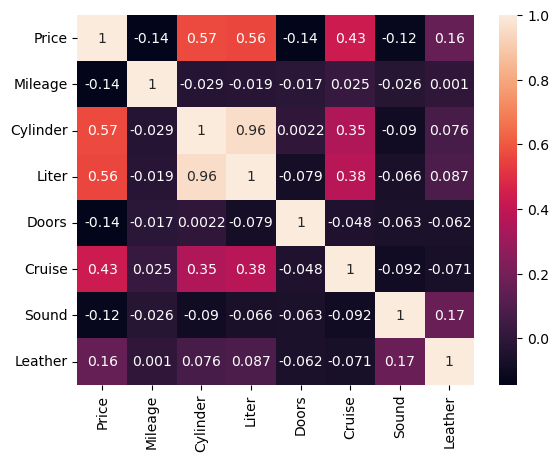

In [11]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [12]:
# outlier formülü ortalama +-3 * Standart sapma

In [13]:
df.Price.mean(),df.Price.median(),df.Price.min(),df.Price.max(), df["Price"].std()#std standart sapma

(21343.143767325837,
 18024.995019071903,
 8638.930895260657,
 70755.46671654288,
 9884.852800898007)

In [14]:
df.tail()#sondan 5 satır

Price  Mileage    Make     Model           Trim   Type  Cylinder  \
799  16507.070267    16229  Saturn  L Series  L300 Sedan 4D  Sedan         6   
800  16175.957604    19095  Saturn  L Series  L300 Sedan 4D  Sedan         6   
801  15731.132897    20484  Saturn  L Series  L300 Sedan 4D  Sedan         6   
802  15118.893228    25979  Saturn  L Series  L300 Sedan 4D  Sedan         6   
803  13585.636802    35662  Saturn  L Series  L300 Sedan 4D  Sedan         6   

     Liter  Doors  Cruise  Sound  Leather  
799    3.0      4       1      0        0  
800    3.0      4       1      1        0  
801    3.0      4       1      1        0  
802    3.0      4       1      1        0  
803    3.0      4       1      0        0

In [15]:
df.isnull().sum()#hangi sütunda kaç boş veri var

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [16]:
df["Make"].unique()# özgün veriler

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [17]:
df.Make.nunique() # kaç tane özgün araba var

6

In [18]:
df.Make.value_counts() # bir arbadan kaç tane var büyükten küçüğe sıralar

Chevrolet    320
Pontiac      150
SAAB         114
Buick         80
Cadillac      80
Saturn        60
Name: Make, dtype: int64

In [19]:
df["Make"].value_counts(normalize=True)*100

Chevrolet    39.800995
Pontiac      18.656716
SAAB         14.179104
Buick         9.950249
Cadillac      9.950249
Saturn        7.462687
Name: Make, dtype: float64

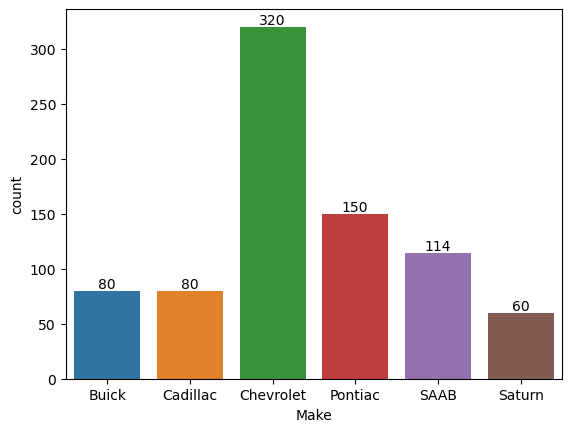

In [20]:
ax=sns.countplot(x=df.Make)
ax.bar_label(ax.containers[0]); # bu satır barların üzerine değerleri yazar

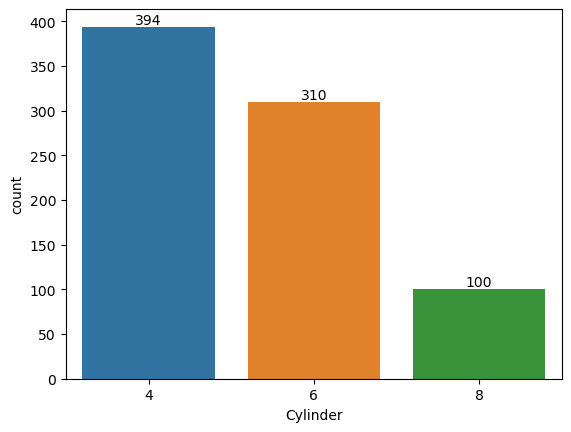

In [21]:
ax=sns.countplot(x=df["Cylinder"]) #x dikey yapar y yazarsak yatay olur
ax.bar_label(ax.containers[0]);

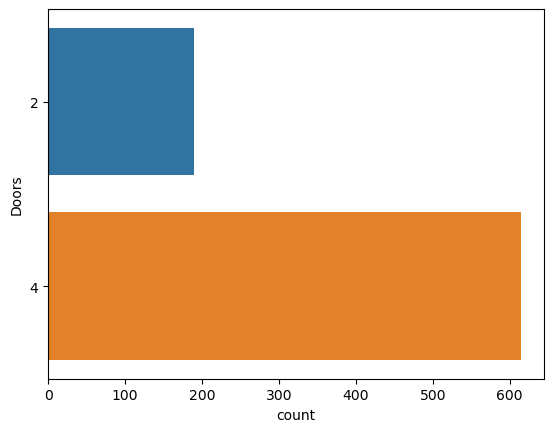

In [22]:
ax=sns.countplot(y=df["Doors"])

/Users/emirkaanozdemir/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


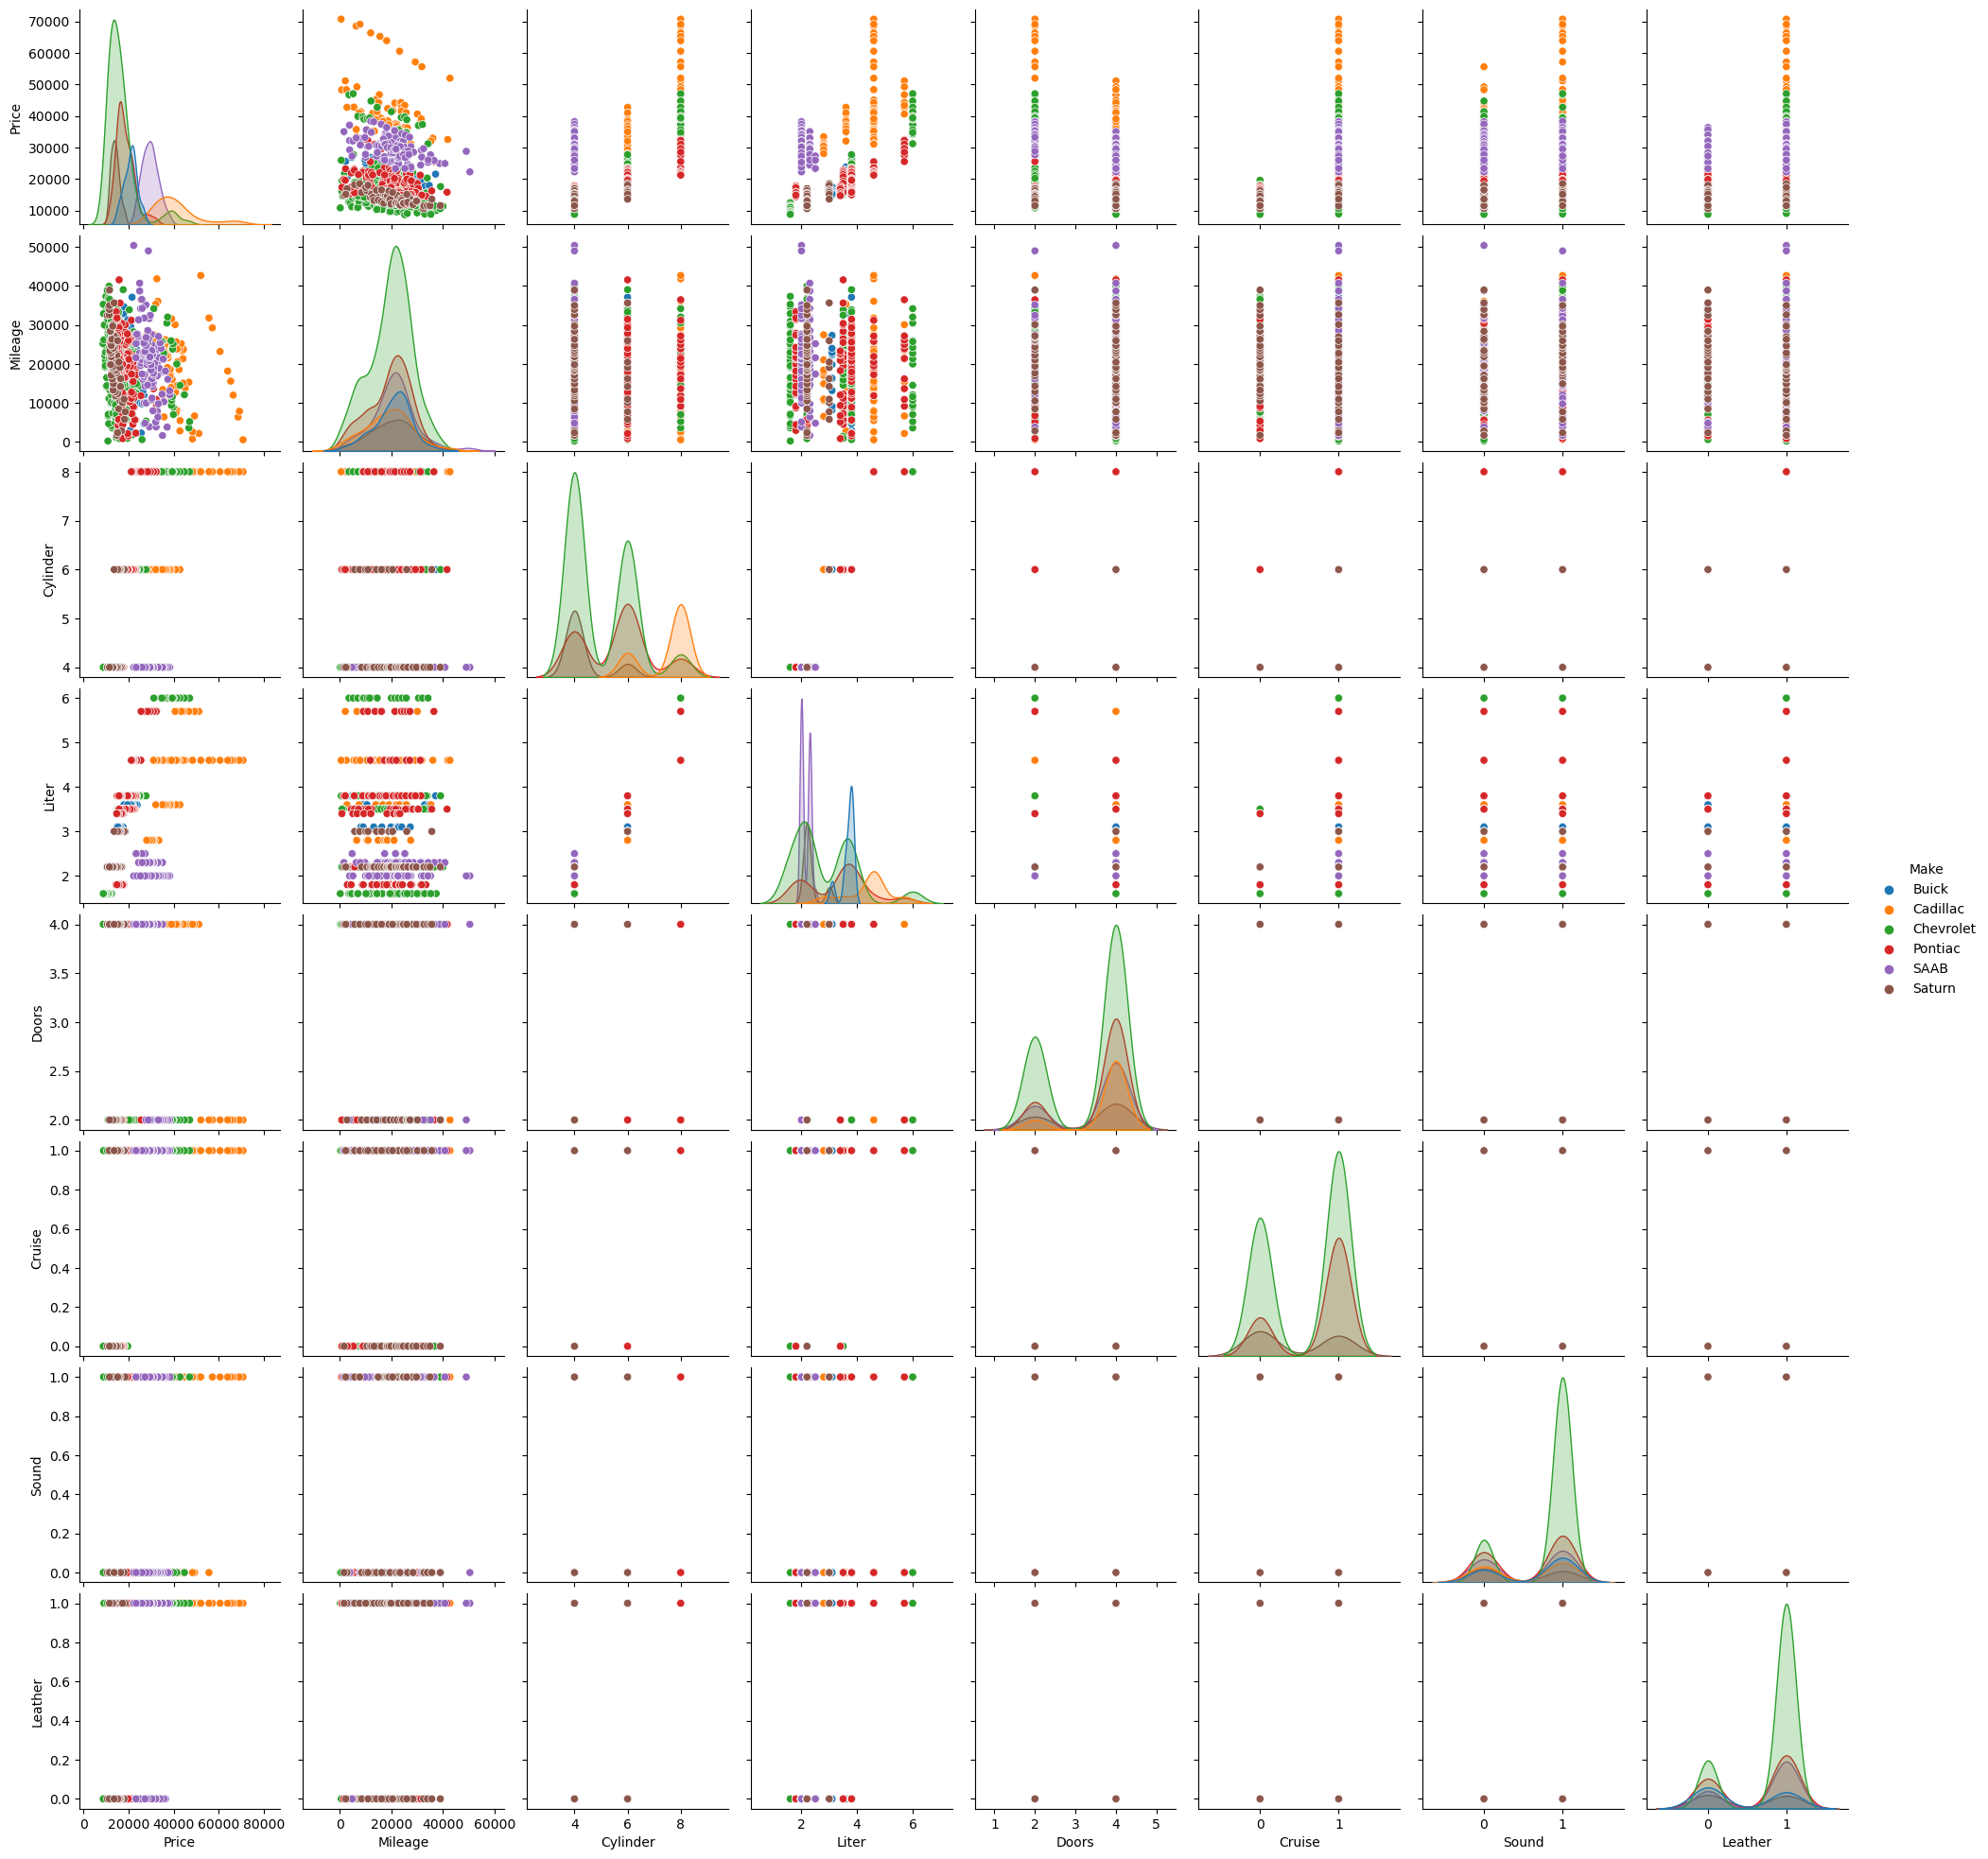

In [23]:
sns.pairplot(df, hue="Make")

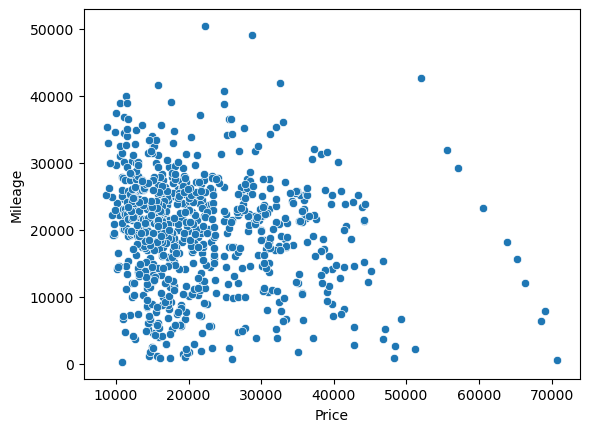

In [24]:
sns.scatterplot(x="Price", y="Mileage", data=df); #fiyatla kilometrenin birbirine göre değişimi

/Users/emirkaanozdemir/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


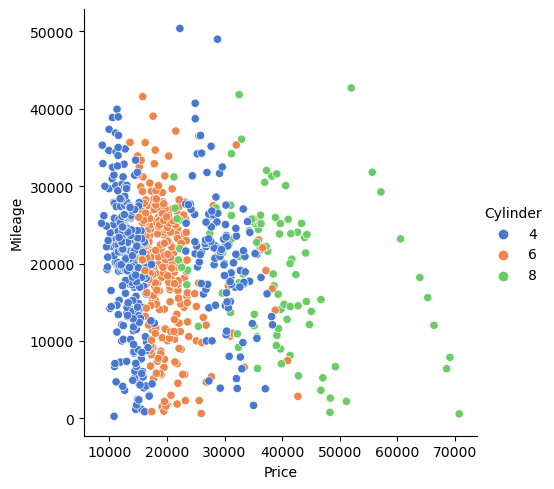

In [25]:
sns.relplot(x="Price", y="Mileage",hue="Cylinder",palette="muted", data=df)
#silindir sayısına göre arablar
#palette renkleri daha canlı yapar

# P - Değeri Hesaplama

In [26]:
#Ho=arabanın fiyatı ve üzerindeki km arasında bir bağ yok
#Ha=arabanın fiyatı ile üzerindeki km arasında bir bağ var
#p değerine bakıyoruz eğer p<0.05 H0 reddet Alternatifi kabul et.

In [27]:
from scipy.stats import ttest_ind 
#scipy kütüphanesi bilimsel metodları barındırır

In [28]:
t,p=ttest_ind(df["Price"], df["Mileage"])
p

0.0008662338227446263

In [29]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(df["Price"], df["Mileage"])
print("Korelasyon:", corr)
print("p-değeri:", p_value)


Korelasyon: -0.14305050619794835
p-değeri: 4.684697954853487e-05


In [31]:
from scipy.stats import zscore
import numpy as np

z_scores = zscore(df["Price"])
outliers = np.where(np.abs(z_scores) > 3)  # 3 genellikle sınır kabul edilir
df_outliers = df.iloc[outliers]
df_outliers

Price  Mileage      Make   Model             Trim         Type  \
80   51154.047216     2202  Cadillac   CST-V         Sedan 4D        Sedan   
150  70755.466717      583  Cadillac  XLR-V8  Hardtop Conv 2D  Convertible   
151  68566.187189     6420  Cadillac  XLR-V8  Hardtop Conv 2D  Convertible   
152  69133.731722     7892  Cadillac  XLR-V8  Hardtop Conv 2D  Convertible   
153  66374.307040    12021  Cadillac  XLR-V8  Hardtop Conv 2D  Convertible   
154  65281.481237    15600  Cadillac  XLR-V8  Hardtop Conv 2D  Convertible   
155  63913.117248    18200  Cadillac  XLR-V8  Hardtop Conv 2D  Convertible   
156  60567.549093    23193  Cadillac  XLR-V8  Hardtop Conv 2D  Convertible   
157  57154.443437    29260  Cadillac  XLR-V8  Hardtop Conv 2D  Convertible   
158  55639.087654    31805  Cadillac  XLR-V8  Hardtop Conv 2D  Convertible   
159  52001.994379    42691  Cadillac  XLR-V8  Hardtop Conv 2D  Convertible   

     Cylinder  Liter  Doors  Cruise  Sound  Leather  
80          8    5.7      4       1      1        1  
150         8    4.6      2       1      1        1  
151         8    4.6      2       1      1        1  
152         8    4.6      2       1      1        1  
153         8    4.6      2       1      1        1  
154         8    4.6      2       1      1        1  
155         8    4.6      2       1      1        1  
156         8    4.6      2       1      1        1  
157         8    4.6      2       1      1        1  
158         8    4.6      2       1      0        1  
159         8    4.6      2       1      1        1

In [30]:
# Sonuç p=0.0008662338227446263 <0.05 sıfır hipotezini reddedip alternatifi kabul ediyoruz

In [33]:
Q1 = df["Price"].quantile(0.25)
Q3 = df["Price"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_outliers = df[(df["Price"] < lower_bound) | (df["Price"] > upper_bound)]
df_outliers

Price  Mileage       Make     Model             Trim         Type  \
80   51154.047216     2202   Cadillac     CST-V         Sedan 4D        Sedan   
81   49248.158967     6685   Cadillac     CST-V         Sedan 4D        Sedan   
82   46747.673270    15343   Cadillac     CST-V         Sedan 4D        Sedan   
140  48310.329545      788   Cadillac    STS-V8         Sedan 4D        Sedan   
141  48365.980897     2616   Cadillac    STS-V8         Sedan 4D        Sedan   
150  70755.466717      583   Cadillac    XLR-V8  Hardtop Conv 2D  Convertible   
151  68566.187189     6420   Cadillac    XLR-V8  Hardtop Conv 2D  Convertible   
152  69133.731722     7892   Cadillac    XLR-V8  Hardtop Conv 2D  Convertible   
153  66374.307040    12021   Cadillac    XLR-V8  Hardtop Conv 2D  Convertible   
154  65281.481237    15600   Cadillac    XLR-V8  Hardtop Conv 2D  Convertible   
155  63913.117248    18200   Cadillac    XLR-V8  Hardtop Conv 2D  Convertible   
156  60567.549093    23193   Cadillac    XLR-V8  Hardtop Conv 2D  Convertible   
157  57154.443437    29260   Cadillac    XLR-V8  Hardtop Conv 2D  Convertible   
158  55639.087654    31805   Cadillac    XLR-V8  Hardtop Conv 2D  Convertible   
159  52001.994379    42691   Cadillac    XLR-V8  Hardtop Conv 2D  Convertible   
340  46732.606030     3625  Chevrolet  Corvette          Conv 2D  Convertible   
341  47065.209913     5239  Chevrolet  Corvette          Conv 2D  Convertible   

     Cylinder  Liter  Doors  Cruise  Sound  Leather  
80          8    5.7      4       1      1        1  
81          8    5.7      4       1      0        1  
82          8    5.7      4       1      1        1  
140         8    4.6      4       1      0        1  
141         8    4.6      4       1      1        1  
150         8    4.6      2       1      1        1  
151         8    4.6      2       1      1        1  
152         8    4.6      2       1      1        1  
153         8    4.6      2       1      1        1  
154         8    4.6      2       1      1        1  
155         8    4.6      2       1      1        1  
156         8    4.6      2       1      1        1  
157         8    4.6      2       1      1        1  
158         8    4.6      2       1      0        1  
159         8    4.6      2       1      1        1  
340         8    6.0      2       1      1        1  
341         8    6.0      2       1      1        1

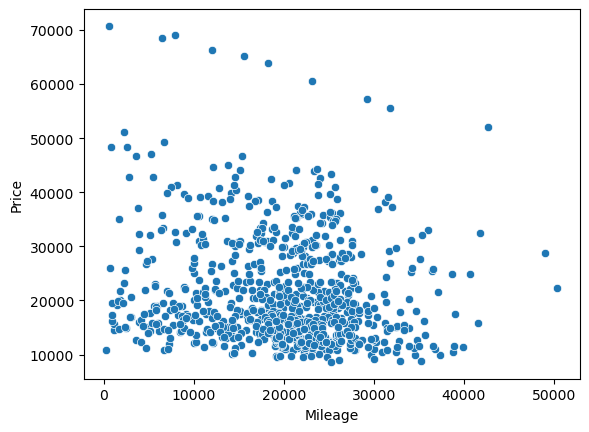

In [36]:
import matplotlib.pyplot as plt
sns.scatterplot(x=df["Mileage"], y=df["Price"])
plt.show()


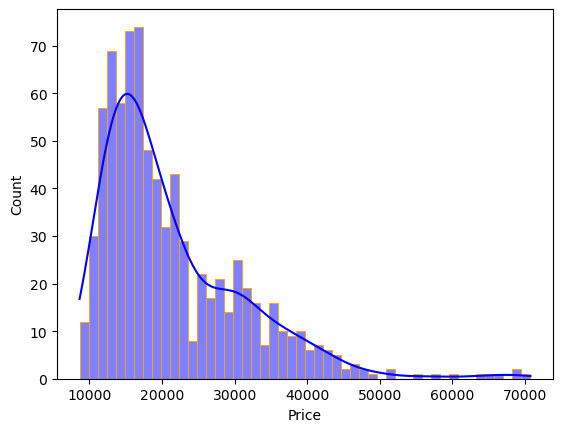

In [31]:
sns.histplot(x=df["Price"], kde=True, color="blue", edgecolor="orange", bins=50);
# kde-->çizgiyi yapar
#bins sayısı artınca detay da artar

# 

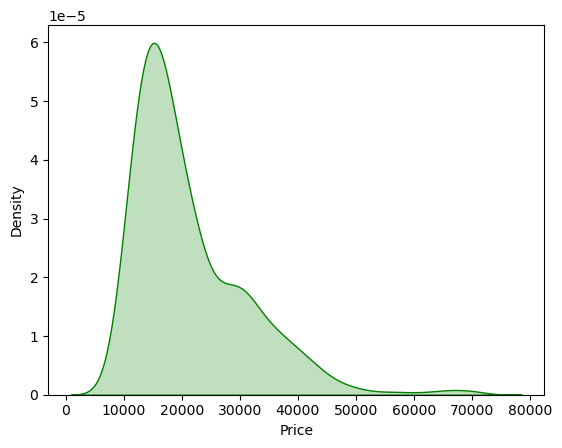

In [32]:
sns.kdeplot(x=df["Price"], fill=True, color="green");

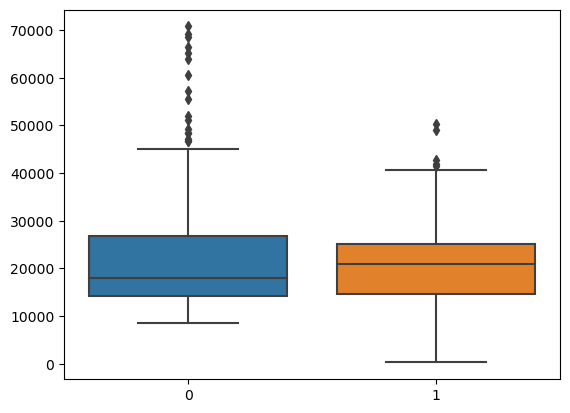

In [33]:
#Outlier bulmak, noktalılar outlier
sns.boxplot([df["Price"], df["Mileage"]]);

<Axes: xlabel='Make', ylabel='Price'>

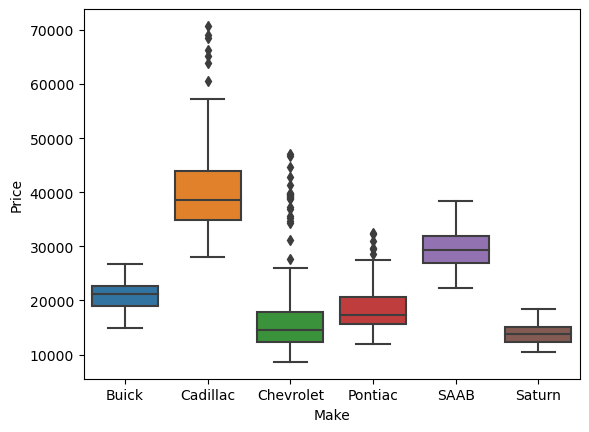

In [34]:
sns.boxplot(x="Make", y="Price", data=df)

<Axes: xlabel='Make', ylabel='Price'>

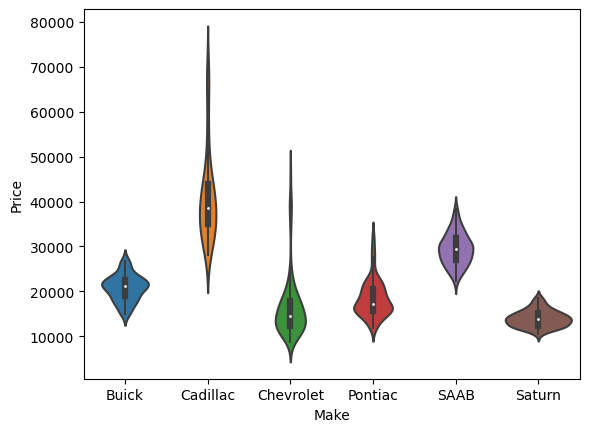

In [35]:
sns.violinplot(x="Make", y="Price", data=df)

In [36]:
import plotly.express as px
#3 boyutlu kütüphane çizme kütüphanesi

In [37]:
px.bar(df,x="Make", y="Price", color="Make")

In [38]:
px.scatter_3d(df,x="Mileage", y="Price", z="Cylinder", color="Make")

In [39]:
#Data Science # MLOps

In [40]:
px.sunburst(df,path=["Make", "Model", "Trim"], values="Price")

### Feature Engineering

In [41]:
df.corr(numeric_only=True)

Price   Mileage  Cylinder     Liter     Doors    Cruise  \
Price     1.000000 -0.143051  0.569086  0.558146 -0.138750  0.430851   
Mileage  -0.143051  1.000000 -0.029461 -0.018641 -0.016944  0.025037   
Cylinder  0.569086 -0.029461  1.000000  0.957897  0.002206  0.354285   
Liter     0.558146 -0.018641  0.957897  1.000000 -0.079259  0.377509   
Doors    -0.138750 -0.016944  0.002206 -0.079259  1.000000 -0.047674   
Cruise    0.430851  0.025037  0.354285  0.377509 -0.047674  1.000000   
Sound    -0.124348 -0.026146 -0.089704 -0.065527 -0.062530 -0.091730   
Leather   0.157197  0.001005  0.075520  0.087332 -0.061969 -0.070573   

             Sound   Leather  
Price    -0.124348  0.157197  
Mileage  -0.026146  0.001005  
Cylinder -0.089704  0.075520  
Liter    -0.065527  0.087332  
Doors    -0.062530 -0.061969  
Cruise   -0.091730 -0.070573  
Sound     1.000000  0.165444  
Leather   0.165444  1.000000

In [42]:
abs(df.corr(numeric_only=True)["Price"].sort_values(ascending=False))
#Modeli oluştururken 0.90 ın altını ve 0.20 nin üstünü alıyoruz.

Price       1.000000
Cylinder    0.569086
Liter       0.558146
Cruise      0.430851
Leather     0.157197
Sound       0.124348
Doors       0.138750
Mileage     0.143051
Name: Price, dtype: float64

In [43]:
x=df[["Mileage","Cylinder", "Liter","Cruise"]]
y=df[["Price"]]

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [46]:
x_train.shape, x_test.shape

((643, 4), (161, 4))

## Modelling

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
lr=LinearRegression()

In [49]:
model=lr.fit(x_train,y_train) #makine öğrenmesi

In [50]:
tahmin=model.predict(x_test)

In [51]:
from sklearn.metrics import r2_score, mean_squared_error

In [52]:
25**0.5

5.0

In [53]:
mean_squared_error(y_test, tahmin)**.5

7413.255792158803

In [54]:
# Label Encoding

In [55]:
x=df[["Mileage","Cylinder", "Liter","Cruise","Make", "Trim"]]
y=df[["Price"]]

In [56]:
x.head()

Mileage  Cylinder  Liter  Cruise   Make      Trim
0     8221         6    3.1       1  Buick  Sedan 4D
1     9135         6    3.1       1  Buick  Sedan 4D
2    13196         6    3.1       1  Buick  Sedan 4D
3    16342         6    3.1       1  Buick  Sedan 4D
4    19832         6    3.1       1  Buick  Sedan 4D

In [57]:
x=pd.get_dummies(x,drop_first=True)
#sözel ve birbirine üstünlük kurmayan dağerler için kullanılır. yani 1 ve 0 ya da True ya da False'ye. dönüşür.

In [58]:
r2_score(y_test,tahmin)

0.3071114906997998

In [59]:
x.head()

Mileage  Cylinder  Liter  Cruise  Make_Cadillac  Make_Chevrolet  \
0     8221         6    3.1       1          False           False   
1     9135         6    3.1       1          False           False   
2    13196         6    3.1       1          False           False   
3    16342         6    3.1       1          False           False   
4    19832         6    3.1       1          False           False   

   Make_Pontiac  Make_SAAB  Make_Saturn  Trim_Aero Conv 2D  ...  \
0         False      False        False              False  ...   
1         False      False        False              False  ...   
2         False      False        False              False  ...   
3         False      False        False              False  ...   
4         False      False        False              False  ...   

   Trim_Quad Coupe 2D  Trim_SE Sedan 4D  Trim_SLE Sedan 4D  Trim_SS Coupe 2D  \
0               False             False              False             False   
1               False             False              False             False   
2               False             False              False             False   
3               False             False              False             False   
4               False             False              False             False   

   Trim_SS Sedan 4D  Trim_SVM Hatchback 4D  Trim_SVM Sedan 4D  Trim_Sedan 4D  \
0             False                  False              False           True   
1             False                  False              False           True   
2             False                  False              False           True   
3             False                  False              False           True   
4             False                  False              False           True   

   Trim_Special Ed Ultra 4D  Trim_Sportwagon 4D  
0                     False               False  
1                     False               False  
2                     False               False  
3                     False               False  
4                     False               False  

[5 rows x 55 columns]

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [61]:
model=lr.fit(x_train,y_train) #makine öğrenmesi

In [62]:
tahmin=model.predict(x_test)

In [63]:
mean_squared_error(y_test,tahmin)**.5
#Root mean squarde error-->Hata
#Bir arabayı 70000 dolar ama +- 1523 hata ile

1523.6314728711297

In [64]:
r2_score(y_test,tahmin)

0.9707311770106379

In [65]:
pd.set_option("display.max_columns",100)
#Bütün sütunları görüntülememizi sağlar

## Farklı Modeller

In [66]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [67]:
R=Ridge()
L=Lasso()
E=ElasticNet()

In [68]:
Rmodel=R.fit(x_train,y_train)

In [69]:
tahmin2=Rmodel.predict(x_test)

In [70]:
mean_squared_error(y_test,tahmin2)**.5

1575.6786242840062

In [71]:
r2_score(y_test,tahmin2)

0.9686973810318732

In [72]:
Lmodel=L.fit(x_train,y_train)

In [73]:
tahmin3=Lmodel.predict(x_test)

In [74]:
mean_squared_error(y_test, tahmin3)**.5
#veri başına ortalama yaptığımız hata

1527.043092830227

In [75]:
r2_score(y_test,tahmin3)

0.9705999564419019

In [76]:
Emodel=E.fit(x_train,y_train)

In [77]:
tahmin4=Emodel.predict(x_test)

In [78]:
mean_squared_error(y_test, tahmin4)**.5

5916.121656152222

In [79]:
r2_score(y_test,tahmin4)

0.558714578586518

In [80]:
# Coefficients - Katsayılar - Fiyatı Etkileme Oranları

In [81]:
lr.coef_
#)katsayıları güsterir

array([[-1.98809431e-01, -2.60219053e+03,  7.38331957e+03,
        -1.05024563e+02,  1.55364461e+04, -2.81688090e+03,
        -3.59594608e+03,  6.85100028e+03, -2.29878609e+03,
         3.90588224e+03, -2.64773527e+03, -1.26995361e+03,
         7.05993990e+03, -2.22310734e+02,  1.38127365e+02,
        -8.04390904e+03, -6.79607391e+03, -6.85437716e+03,
         3.54018314e+03, -5.72790226e+03, -1.11979437e+04,
        -8.32030557e+03, -7.59431897e+03, -8.10925499e+03,
        -6.53924263e+03, -3.82628105e+02, -5.76220228e+03,
        -3.63992297e+03,  1.67584142e+04, -5.32327214e+03,
        -7.83067529e+03, -4.64523486e+03, -7.53303979e+03,
        -6.65186020e+03, -7.63546793e+03, -6.87040602e+03,
        -6.33606759e+03, -3.92489639e+03, -7.03882417e+03,
        -6.17480932e+03, -8.14421976e+03,  4.52867027e+03,
        -2.53728086e+03, -2.10433902e+03, -7.88530569e+03,
        -6.07227049e+03, -6.65263910e+03, -5.53516395e+03,
        -4.78023915e+03, -3.13661125e+03, -6.92039280e+0

In [82]:
feature_importance=pd.DataFrame({"Feature":x_train.columns,"Coefs":lr.coef_[0]})

In [83]:
feature_importance=feature_importance.sort_values(by="Coefs", ascending=False)

In [84]:
feature_importance

Feature         Coefs
28      Trim_Hardtop Conv 2D  16758.414214
4              Make_Cadillac  15536.446130
2                      Liter   7383.319566
12          Trim_Arc Conv 2D   7059.939896
7                  Make_SAAB   6851.000276
41       Trim_Linear Conv 2D   4528.670272
9          Trim_Aero Conv 2D   3905.882237
18              Trim_Conv 2D   3540.183141
14         Trim_Arc Wagon 4D    138.127365
0                    Mileage     -0.198809
3                     Cruise   -105.024563
13         Trim_Arc Sedan 4D   -222.310734
25        Trim_GT Sportwagon   -382.628105
11        Trim_Aero Wagon 4D  -1269.953605
54        Trim_Sportwagon 4D  -1453.737428
43      Trim_Linear Wagon 4D  -2104.339024
8                Make_Saturn  -2298.786085
42      Trim_Linear Sedan 4D  -2537.280862
1                   Cylinder  -2602.190533
10        Trim_Aero Sedan 4D  -2647.735267
5             Make_Chevrolet  -2816.880903
49          Trim_SS Sedan 4D  -3136.611254
6               Make_Pontiac  -3595.946075
27         Trim_GXP Sedan 4D  -3639.922969
37      Trim_LT Hatchback 4D  -3924.896395
31      Trim_LS Hatchback 4D  -4645.234857
48          Trim_SS Coupe 2D  -4780.239150
53  Trim_Special Ed Ultra 4D  -4875.643850
29        Trim_L300 Sedan 4D  -5323.272136
51         Trim_SVM Sedan 4D  -5515.189525
47         Trim_SLE Sedan 4D  -5535.163950
19             Trim_Coupe 2D  -5727.902260
26         Trim_GTP Sedan 4D  -5762.202280
45        Trim_Quad Coupe 2D  -6072.270492
39          Trim_LT Sedan 4D  -6174.809319
36          Trim_LT Coupe 2D  -6336.067587
24          Trim_GT Sedan 4D  -6539.242633
33          Trim_LS Sedan 4D  -6651.860202
46          Trim_SE Sedan 4D  -6652.639100
16         Trim_CXL Sedan 4D  -6796.073911
17         Trim_CXS Sedan 4D  -6854.377165
35    Trim_LS Sport Sedan 4D  -6870.406019
50     Trim_SVM Hatchback 4D  -6920.392799
38     Trim_LT MAXX Hback 4D  -7038.824171
32     Trim_LS MAXX Hback 4D  -7533.039792
22         Trim_DTS Sedan 4D  -7594.318973
34    Trim_LS Sport Coupe 2D  -7635.467926
52             Trim_Sedan 4D  -7770.244748
30          Trim_LS Coupe 2D  -7830.675291
44        Trim_MAXX Hback 4D  -7885.305685
15          Trim_CX Sedan 4D  -8043.909039
23          Trim_GT Coupe 2D  -8109.254993
40     Trim_Limited Sedan 4D  -8144.219762
21         Trim_DHS Sedan 4D  -8320.305567
20      Trim_Custom Sedan 4D -11197.943729

In [85]:
import matplotlib.pyplot as plt

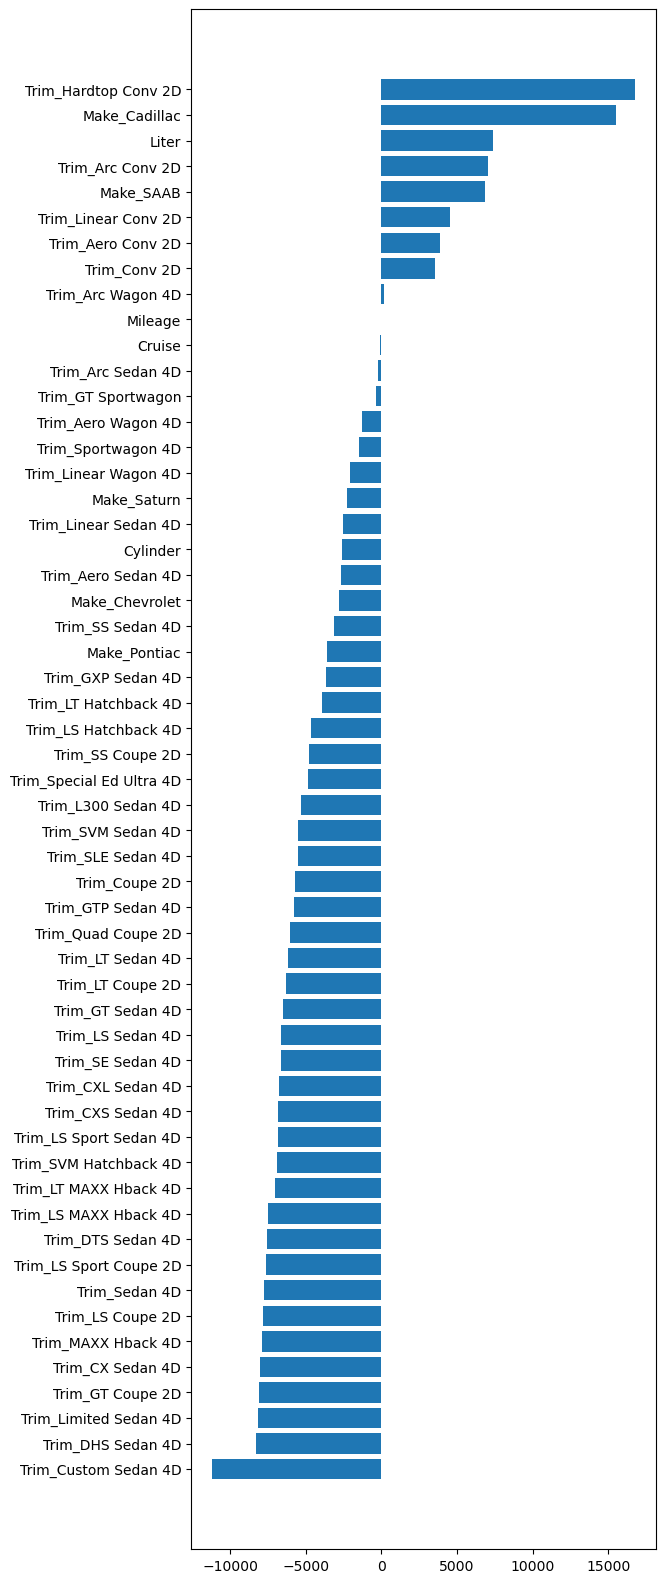

In [86]:
plt.figure(figsize=(6,20))
plt.barh(feature_importance["Feature"],feature_importance["Coefs"])
plt.gca().invert_yaxis()#pozitifleri önce getirir

In [87]:
residuals=tahmin-y_test

In [88]:
residuals

Price
192  -559.667911
717 -1027.528386
168 -1144.233441
522 -2909.433116
536  -494.086073
..           ...
658   812.069687
356 -4025.396437
525 -2361.161783
748   961.806180
517 -3242.062971

[161 rows x 1 columns]

<Axes: ylabel='Count'>

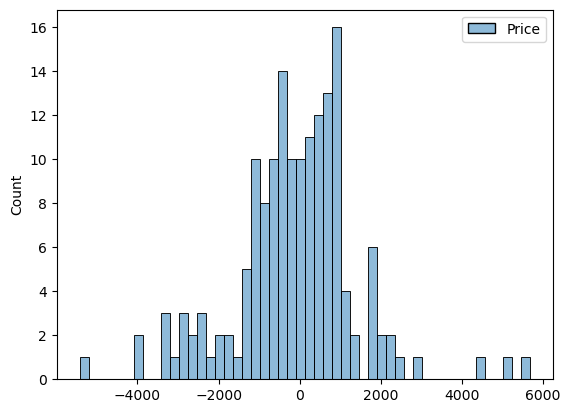

In [89]:
sns.histplot(residuals, bins=50)

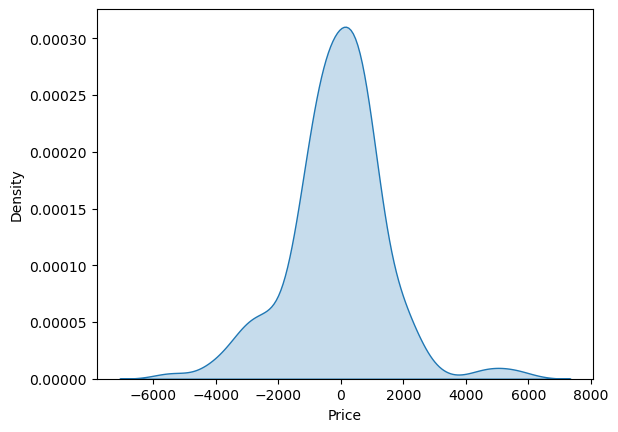

In [90]:
sns.kdeplot(x=residuals["Price"], fill=True);

In [91]:
from sklearn.tree import DecisionTreeRegressor

In [92]:
dt=DecisionTreeRegressor()

In [93]:
Dmodel=dt.fit(x_train,y_train)

In [94]:
tahmin5=dt.predict(x_test)

In [96]:
mean_squared_error(y_test,tahmin5)**.5

1796.900368422353

In [97]:
r2_score(y_test,tahmin5)

0.9592907235519847

In [99]:
from sklearn.ensemble import ExtraTreesRegressor

In [100]:
ET=ExtraTreesRegressor()

In [101]:
ETModel=ET.fit(x_train,y_train)

/Users/emirkaanozdemir/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [102]:
tahmin6=ET.predict(x_test)

In [103]:
mean_squared_error(y_test,tahmin6)**.5

910.5270230548163

In [104]:
r2_score(y_test,tahmin6)

0.9895472378791083